# Assignment 6: Model Evaluation and Model Selection

### Objective: In this assignment, you will gain hands-on experience in evaluating the performance of machine learning models and selecting the best features for your model. The assignment will focus on the following concepts:

- Accuracy evaluation using cross-validation
- Confidence intervals for the accuracy or the error rate
- Hyperparameter tuning using grid search
- Evaluation metrics such as Precision, Recall, and F1-Score, ROC-AUC
- Feature selection methods: Filter methods, Embedded methods, and Wrapper methods
- Feature extraction methods, such as Principal Component Analysis (PCA)

### Dataset:

In this assignment we will use the "Bank Marketing" dataset. This dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe to a term deposit (yes/no). 

The dataset contains 20 input features, such as age, job, marital status, education, and others. The target variable is imbalanced, with the majority of the clients not subscribing to the term deposit.

You can find the Bank Marketing dataset on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

For your convenience, the dataset has been dowloaded and can be found in the Data folder.

## Write Python code to complete each of the tasks below.

### 1. Load the dataset into a Pandas dataframe and show the first five rows.

In [12]:
# Your code here
import pandas as pd




data = pd.read_csv('data/bank-additional.csv', sep=';')

print(data.head())


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

### 2. Preprocess the data

The dataset contains a combination of numberic and categorical features. The majority of machine learning algorithms work with numeric features. For that reason, we need to convert all our features to numeric by introducing dummy variables using one-hot encoding. We will also normalize the numeric featues to a mean of zero and std of one as most ML algorithms work best with normalized features.

(The solution to this step is given below)

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocess categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_features = [col for col in data.columns if col not in categorical_features + ['y']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Split into features and targets
X = data.drop(columns=['y'])
y = data['y'].map({'no': 0, 'yes': 1})

# Preprocess the features
X = preprocessor.fit_transform(X)

# Get the column names for the one-hot encoded features
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

# Combine the numeric and one-hot encoded feature names
all_feature_names = numeric_features + list(onehot_columns)

# Convert the transformed matrix X back into a DataFrame with the feature names. Pandas provides functions for explorarory data analysis.
X = pd.DataFrame(X, columns=all_feature_names)

print(X.head())

        age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.980752  0.903952 -0.209228  0.201031 -0.351356     -1.206054   
1 -0.107991  0.350300  0.569634  0.201031 -0.351356      0.649441   
2 -1.465619 -0.116966 -0.598660  0.201031 -0.351356      0.841389   
3 -0.204965 -0.941553  0.180203  0.201031 -0.351356      0.841389   
4  0.667795 -0.780563 -0.598660  0.201031 -0.351356     -0.118350   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0       -1.185448      -1.240939  -1.331707    -0.914779  ...        0.0   
1        0.715193       0.892269   0.711698     0.332862  ...        0.0   
2        1.528273      -0.283172   0.773427     0.836535  ...        0.0   
3        1.528273      -0.283172   0.771697     0.836535  ...        0.0   
4       -0.655478      -0.326707   0.328632     0.398028  ...        0.0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0        0.0              1.0              0.0              0

### 3. Perform and Exploratory Data Analysis

1. Display a histogram of each feature so we can see the distribution of their values.
2. Use Seaborn to display a barplot of the correlation of each feature with the target variable.

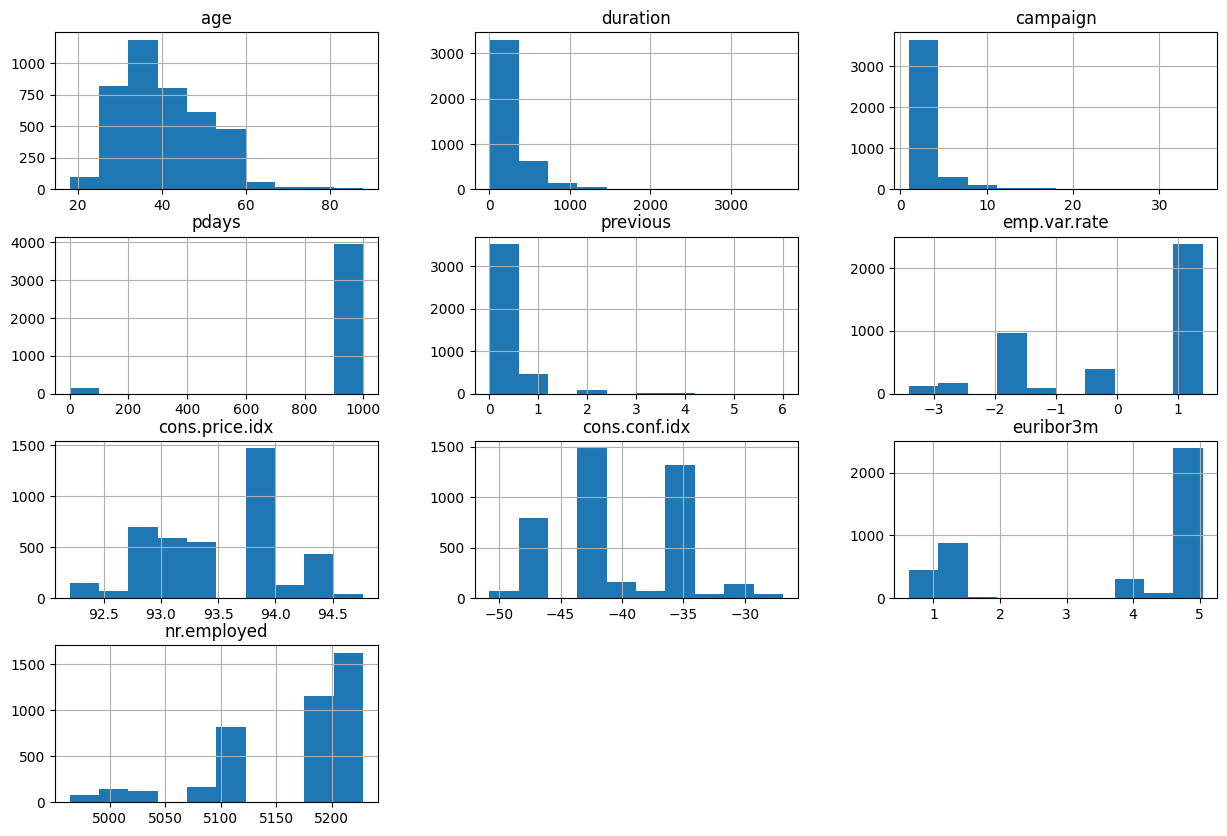

In [14]:
# Your code here

import matplotlib.pyplot as plt 

data.hist(figsize=(15, 10))
plt.show()

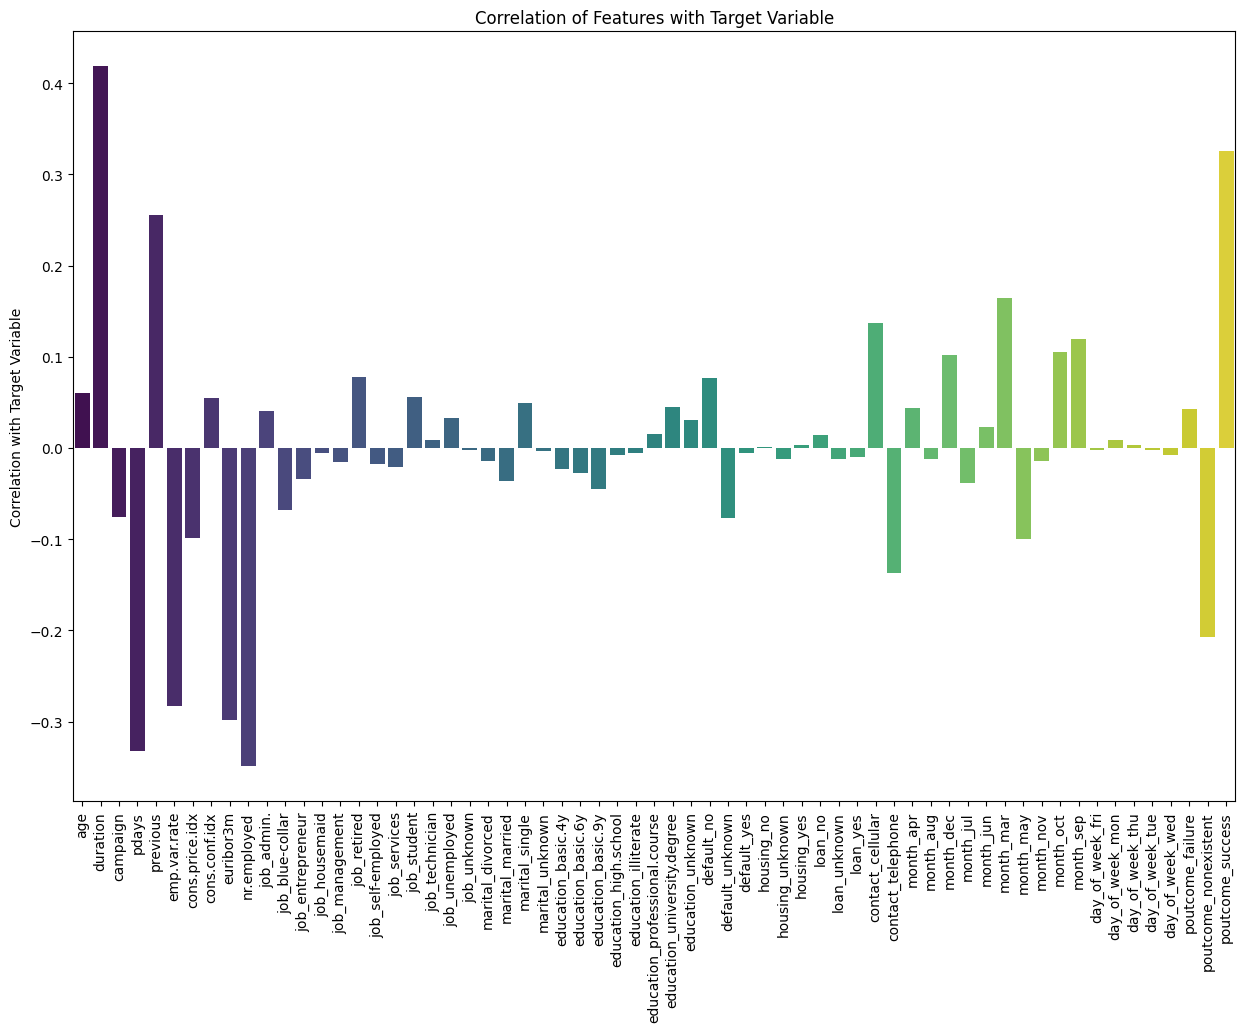

In [22]:
# Your code here
import seaborn as sns
import numpy as np

correlation = X.apply(lambda x: x.corr(y))
plt.figure(figsize=(15, 10))

sns.barplot(x=correlation.index, y=correlation, palette='viridis')

plt.xticks(rotation = 90)
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation of Features with Target Variable')

plt.show()

**What are your takeways from the exploratory data analysis?**

(Edit this cell and add your answer)
Positive and negative correlations. Positive values show that as the value increases, the target value also increases. Same for negative correlation as the value of feauture increases the target value decreases.
If features are highly correlated, they show similar info. This causes multicolllinearity and can can cause instability in coefficients. Also using diffferent diagrams can help show features better.
Also, features with higher absolute correlation values show a stronger linear relationship with target variables. These show the importance when trying to predict the target.



### 4. Split the data into a stratified 80/20 train/test split.

In [24]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print("Training size: ", len(X_train))
print("Test size:", len(X_test))

Training size:  3295
Test size: 824


### 5. Apply feature selection

Use the following feature selection methods:
1. Filter: Variance Threshold with a threshold of 0.1
2. Embedded: Use the LASSO L1 penalty in the LogisticRegressionCV and keep the features with non-zero coefficients
3. Wrapper: Use Recursive Feature Elimination (RFECV) with Logistic Regression as the estimator.
4. Feature Extraction: Use PCA to extract the top 20 components

For the first three feature selection methods, print out the names of the features that were selected.

**Note:** Since this is an imbalanced dataset using the default scoring criterion, which is classification Accuracy, will not yield good results. For that reason, you should use the F1-Score (`scoring='f1'`) whenever you fit a classifier.

In [43]:
# Your code here
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, make_scorer

select = VarianceThreshold(threshold=0.1)
X_filtered = select.fit_transform(X_train)
feat_filt = X.columns[select.get_support()]
print("Features selected by variance Threshold: ", feat_filt.tolist())

cl=LogisticRegressionCV(penalty='l1', solver='saga', scoring=make_scorer(f1_score), cv=5, random_state = 42, max_iter=5000, n_jobs=-1)
cl.fit(X_train, y_train)
feat_lasso=X.columns[cl.coef_[0]!=0]
print("\nFeatures selected by lasso l1 penalty: ", feat_lasso.tolist())

est=LogisticRegression(max_iter=1000, random_state=42)
rfecv=RFECV(est, step=1, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
rfecv.fit(X_train, y_train)
feat_rfe=X.columns[rfecv.get_support()]
print("\nFeatures selected by Recursice Feature Elimintions: ", feat_rfe.tolist())

pca = PCA(n_components=20)
X_pca=pca.fit_transform(X_train)



Features selected by variance Threshold:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_technician', 'marital_married', 'marital_single', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'default_no', 'default_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_aug', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent']

Features selected by lasso l1 penalty:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_self-employed', 'job_technician', 'marital_divorced', 'marital_single', 'default_no', 'default_unknown', 'housing_no'

### 6. Fine Tune a Classification Algorithm

We will use the `GradientBoostingClassifier` which is know to be one of the most powefull ensemble algorithms. Some of the hyperparameters that can be tuned when training a GradientBoostingClassifier are:
- Number of estimators (trees): try 100, 200, 300
- Learning rate: try 0.01, 0.1
- Max (tree) depth: try 3, 4

Use `GridSearchCV` to train your classifier for the different hyperparameter values. Remember to use F1-score as your scoring criterion.

Tune your model on the features selected by each one of the methods above.

In [51]:
# Your code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1],
    'max_depth' : [3, 4]
}
gb_cl = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_cl, grid, scoring='f1', cv=5, n_jobs=-1)
feat_list = [feat_filt, feat_lasso, feat_rfe]

for i, sel_feat in enumerate(feat_list, 1):
    print(f"Feature Select Method {i}:")
    X_train_select = X_train[sel_feat]
    X_test_select = X_test[sel_feat]
    grid_search.fit(X_train_select, y_train)
    best_params=grid_search.best_params_
    print("Best HyperPerams:", best_params)
    best_score=grid_search.best_score_
    print(f"Best f1-score on validation data: {best_score:.4f}\n")
    

Feature Select Method 1:
Best HyperPerams: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best f1-score on validation data: 0.5526

Feature Select Method 2:
Best HyperPerams: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best f1-score on validation data: 0.5531

Feature Select Method 3:
Best HyperPerams: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best f1-score on validation data: 0.5664



### 7. Evaluate your tuned models on the test data

For each one of the tuned models, print out the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

For the model that produces the best f1-score, print out the confusion matrix and classification report using the skearn `classification_report` function.


In [58]:
# Your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1],
    'max_depth' : [3, 4]
}

grid_search = GridSearchCV(gb_cl, grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train_select, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters", best_params)

best_mod = GradientBoostingClassifier(random_state=42, **best_params)
best_mod.fit(X_train_select, y_train)
y_pred = best_mod.predict(X_test_select)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report)


Best Hyperparameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy:  0.9065533980582524
Precision:  0.6065573770491803
Recall:  0.4111111111111111
F1-Score:  0.4900662251655629
ROC-AUC 0.6892067817135936
Confusion Matrix: 
 [[710  24]
 [ 53  37]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       734
           1       0.61      0.41      0.49        90

    accuracy                           0.91       824
   macro avg       0.77      0.69      0.72       824
weighted avg       0.90      0.91      0.90       824



### 8. Discuss your results

**What are your main takeaways from this assignment?**

(Edit this cell and add your answer)

Preprocessing is very important to make the data fit the model. One-hot encoding is used for the categorical variables and data scaling for the numerical variables. We used GradientBoostingClassifier as the model and used gridserachcv to find the best combination of hyperperameters. This helps find the most efficient model configuration that recieves the best performance on the dataset. We used three feature selection methods that helped reduce dimensionality of the dataset and improved the model performance by finding the ebst features. We found many different evaluation metrics to get a better understanding of the models performance. WE used the confusion matrix and classification report to get information about how well the model is classifying the classes. Also, that feature selection 3 had the best f1-score.